In [39]:
from sympy import *
init_printing();

x, x01, y, p, power, E_in, E_out, slope_in, slope_out, slope = symbols('x x01 y p power E_in E_out slope_in slope_out slope')

# Exponential

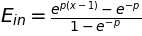

In [2]:
_E_in = Eq(E_in, (exp(p*(x-1))-exp(-p))*(1/(1-exp(-p))))
_E_in

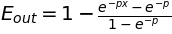

In [3]:
_E_out = Eq(E_out, 1-((exp(-p*x)-exp(-p))/(1-exp(-p))))
_E_out

# slopeAt(x)

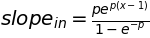

In [4]:
_slope_in = Eq(slope_in, diff(_E_in.rhs, x))
_slope_in

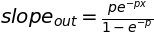

In [5]:
_slope_out = Eq(slope_out, diff(_E_out.rhs, x))
_slope_out

# xAtWhichSlopeEquals(slope)

In [13]:
xAtWhichSlopeEqualsIn = solveset(_slope_in, x, domain=S.Reals)
xAtWhichSlopeEqualsIn

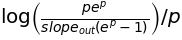

In [7]:
x_slope_out=solve(_slope_out, x)[0]
x_slope_out

# inverseFunction(y)

In [46]:
inverseFunctionIn = solveset(_E_in, x, domain=S.Reals)
inverseFunctionIn

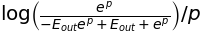

In [50]:
inverseFunctionOut = solve(_E_out, x)[0]
inverseFunctionOut

---

In [10]:
jscode(solve(_E_out, x)[0])

'Math.log(Math.exp(p)/(-E_out*Math.exp(p) + E_out + Math.exp(p)))/p'

In [11]:
jscode(solveset(_slope_in, x, domain=S.Reals))

'// Not supported in Javascript:\n// Intersection\nIntersection(S.Reals, {1 + log(slope_in*(exp(p) - 1)*exp(-p)/p)/p})'

In [37]:
jscode(xAtWhichSlopeEqualsIn.args[1].args[0].subs({slope_in:slope, p:power}))

'1 + Math.log(slope*(Math.exp(power) - 1)*Math.exp(-power)/power)/power'

In [40]:
jscode(_slope_in.rhs.subs({p:power, x:x01}))

'power*Math.exp(power*(x01 - 1))/(1 - Math.exp(-power))'

In [43]:
jscode(_slope_out.rhs.subs({p:power, x:x01}))

'power*Math.exp(-power*x01)/(1 - Math.exp(-power))'

In [45]:
jscode(x_slope_out.subs({p:power, slope_out:slope}))

'Math.log(power*Math.exp(power)/(slope*(Math.exp(power) - 1)))/power'

In [49]:
jscode(inverseFunctionIn.args[1].args[0].subs({p:power, E_in:y}))

'1 + Math.log((y*(Math.exp(power) - 1) + 1)*Math.exp(-power))/power'

In [53]:
jscode(inverseFunctionOut.subs({p:power, E_out:y}))

'Math.log(Math.exp(power)/(-y*Math.exp(power) + y + Math.exp(power)))/power'